In [311]:
import numpy
numpy.__version__

'1.21.2'

### importing required libraries

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### importing a dataset

In [313]:
flight=pd.read_excel("C:/Users/mounika/Desktop/aug DS files/AUG DS DATA files/flight_Data_Train.xlsx")

In [314]:
#!pip install openpyxl

In [315]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [316]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [317]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [318]:
flight.columns.value_counts().sum()

11

In [319]:
flight.columns.unique()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [320]:
flight.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [321]:
flight.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [322]:
price_vs_Airline=flight.groupby(['Airline'])['Price'].mean()
price_vs_Airline

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [323]:
flight.groupby(['Source'])['Destination'].value_counts()

Source    Destination
Banglore  Delhi          1265
          New Delhi       932
Chennai   Kolkata         381
Delhi     Cochin         4537
Kolkata   Banglore       2871
Mumbai    Hyderabad       697
Name: Destination, dtype: int64

In [324]:
features=['Airline','Source','Destination','Additional_Info']

In [325]:
for i in features :
    print(i, flight[i].unique())
    print('                 ')
    print('                 ')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
                 
                 
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
                 
                 
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
                 
                 
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
                 
                 


### split date into date,month,year format

In [326]:
flight.Date_of_Journey = flight['Date_of_Journey'].str.split('/')


In [327]:
flight.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [328]:
flight['Date']=flight.Date_of_Journey.str[0]
flight['Month']=flight.Date_of_Journey.str[1]
flight['Year']=flight.Date_of_Journey.str[2]

In [329]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


### spliting a cities in route

In [330]:
flight.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [331]:
flight.Route=flight.Route.str.split('→')


In [332]:
flight['City1']=flight.Route.str[0]
flight['City2']=flight.Route.str[1]
flight['City3']=flight.Route.str[2]
#flight['City4']=flight.Route.str[3]
#flight['City5']=flight.Route.str[4]
#flight['City6']=flight.Route.str[5]


In [333]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL


### split the 'Dep_time' column into 'min' and 'hour' columns

In [334]:
flight.Dep_Time =flight.Dep_Time.str.split(':')

In [335]:
flight['Dep_Time_Hour'] =flight.Dep_Time.str[0] 
flight['Dep_Time_Min'] =flight.Dep_Time.str[1]

### split the 'arrival_time' into 'arrival_date' column

In [336]:
flight.Arrival_Time = flight.Arrival_Time.str.split(' ')

In [337]:
flight['Arrival_Date'] = flight.Arrival_Time.str[1]

In [338]:
flight['Time_of_Arrival']=flight.Arrival_Time.str[0] 

In [339]:
flight['Time_of_Arrival']= flight.Time_of_Arrival.str.split(':')

In [340]:
flight['Arrival_time_in_Hours'] = flight.Time_of_Arrival.str[0]

In [341]:
flight['Arrival_time_in_Mins'] = flight.Time_of_Arrival.str[1]

### spliting a duration column

In [342]:
flight.Duration = flight.Duration.str.split(' ')

In [343]:
flight['Travel_Hours']= flight.Duration.str[0]

In [344]:
flight['Travel_Hours']= flight['Travel_Hours'].str.split('h')

In [345]:
flight['Travel_Hours']=flight['Travel_Hours'].str[0]

In [346]:
flight.Travel_Hours=flight.Travel_Hours

In [347]:
flight['Travel_Mins']=flight.Duration.str[1]

In [348]:
flight['Travel_Mins']=flight['Travel_Mins'].str.split('m')

In [349]:
flight['Travel_Mins']=flight['Travel_Mins'].str[0]

### managing the total stop column

In [350]:
flight.Total_Stops.replace('non-stop','0', inplace=True)

In [351]:
flight.Total_Stops=flight.Total_Stops.str.split(' ')

In [352]:
flight.Total_Stops = flight.Total_Stops.str[0]

### handling 'additional_info' column since there is 'No Info' we replace with 'No info'

In [353]:
flight.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [354]:
flight.Additional_Info.replace('No Info','No info', inplace=True)

### lets drop unwanted original columns and treat the missing data 

In [355]:
flight.isnull().sum()

Airline                     0
Date_of_Journey             0
Source                      0
Destination                 0
Route                       1
Dep_Time                    0
Arrival_Time                0
Duration                    0
Total_Stops                 1
Additional_Info             0
Price                       0
Date                        0
Month                       0
Year                        0
City1                       1
City2                       1
City3                    3492
Dep_Time_Hour               0
Dep_Time_Min                0
Arrival_Date             6348
Time_of_Arrival             0
Arrival_time_in_Hours       0
Arrival_time_in_Mins        0
Travel_Hours                0
Travel_Mins              1032
dtype: int64

In [356]:
flight[flight['City1'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Time_of_Arrival,Arrival_time_in_Hours,Arrival_time_in_Mins,Travel_Hours,Travel_Mins
9039,Air India,"[6, 05, 2019]",Delhi,Cochin,NaN,"[09, 45]","[09:25, 07, May]","[23h, 40m]",NaN,No info,...,NaN,NaN,09,45,07,"[09, 25]",09,25,23,40


In [357]:
flight['City3'].fillna('None',inplace = True)

In [358]:
flight['Arrival_Date'].fillna(flight['Date'],inplace=True)

In [359]:
flight['Travel_Mins'].fillna(0,inplace = True)

In [360]:
flight['City1'].fillna('DEL',inplace = True)

In [361]:
flight['City2'].fillna('COK',inplace = True)

In [362]:
flight['Total_Stops'].fillna('0',inplace = True)

In [363]:
flight['Route'].fillna('None',inplace = True)

In [364]:
flight.drop('Route',axis=1 ,inplace=True)

In [365]:
flight.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    0
City2                    0
City3                    0
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_Date             0
Time_of_Arrival          0
Arrival_time_in_Hours    0
Arrival_time_in_Mins     0
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [366]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10683 non-null  object
 1   Date_of_Journey        10683 non-null  object
 2   Source                 10683 non-null  object
 3   Destination            10683 non-null  object
 4   Dep_Time               10683 non-null  object
 5   Arrival_Time           10683 non-null  object
 6   Duration               10683 non-null  object
 7   Total_Stops            10683 non-null  object
 8   Additional_Info        10683 non-null  object
 9   Price                  10683 non-null  int64 
 10  Date                   10683 non-null  object
 11  Month                  10683 non-null  object
 12  Year                   10683 non-null  object
 13  City1                  10683 non-null  object
 14  City2                  10683 non-null  object
 15  City3              

### changing all  the datatype of object into int

In [367]:
flight.Total_Stops = flight.Total_Stops.astype('int64')
flight.Date = flight.Date.astype('int64')
flight.Month = flight.Month.astype('int64')
flight.Year = flight.Year.astype('int64')
flight.Dep_Time_Hour = flight.Dep_Time_Hour.astype('int64')
flight.Dep_Time_Min = flight.Dep_Time_Min.astype('int64')
flight.Arrival_Date = flight.Arrival_Date.astype('int64')
flight.Arrival_time_in_Hours = flight.Arrival_time_in_Hours.astype('int64')
flight.Arrival_time_in_Mins = flight.Arrival_time_in_Mins.astype('int64')
flight.Travel_Mins = flight.Travel_Mins.astype('int64')
#flight.Travel_Hours = flight.Travel_Hours.astype('int64')

### above we are unable to convert'flight.Travel_Hours'  because it shows 5m object error, that we vl solve here

In [368]:
flight[flight['Travel_Hours']=='5m']

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Time_of_Arrival,Arrival_time_in_Hours,Arrival_time_in_Mins,Travel_Hours,Travel_Mins
6474,Air India,"[6, 03, 2019]",Mumbai,Hyderabad,"[16, 50]",[16:55],[5m],2,No info,17327,...,GOI,PNQ,16,50,6,"[16, 55]",16,55,5m,0


#### since above row has incorrect data that is 2 stop, cant be travel in 5mins, we vl drop that row

In [369]:
flight.drop(index=6474, inplace=True, axis=0)

#### now we cant convert its datatype

In [370]:
flight.Travel_Hours = flight.Travel_Hours.astype('int64')

### create a diff list column for str and int

In [371]:
categories= ["Airline",'Source','Destination','Additional_Info','City1','City2','City3']

In [372]:
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_Date',
           'Arrival_time_in_Hours','Arrival_time_in_Mins','Travel_Hours',"Travel_Mins"]

## plotting and analysing the data

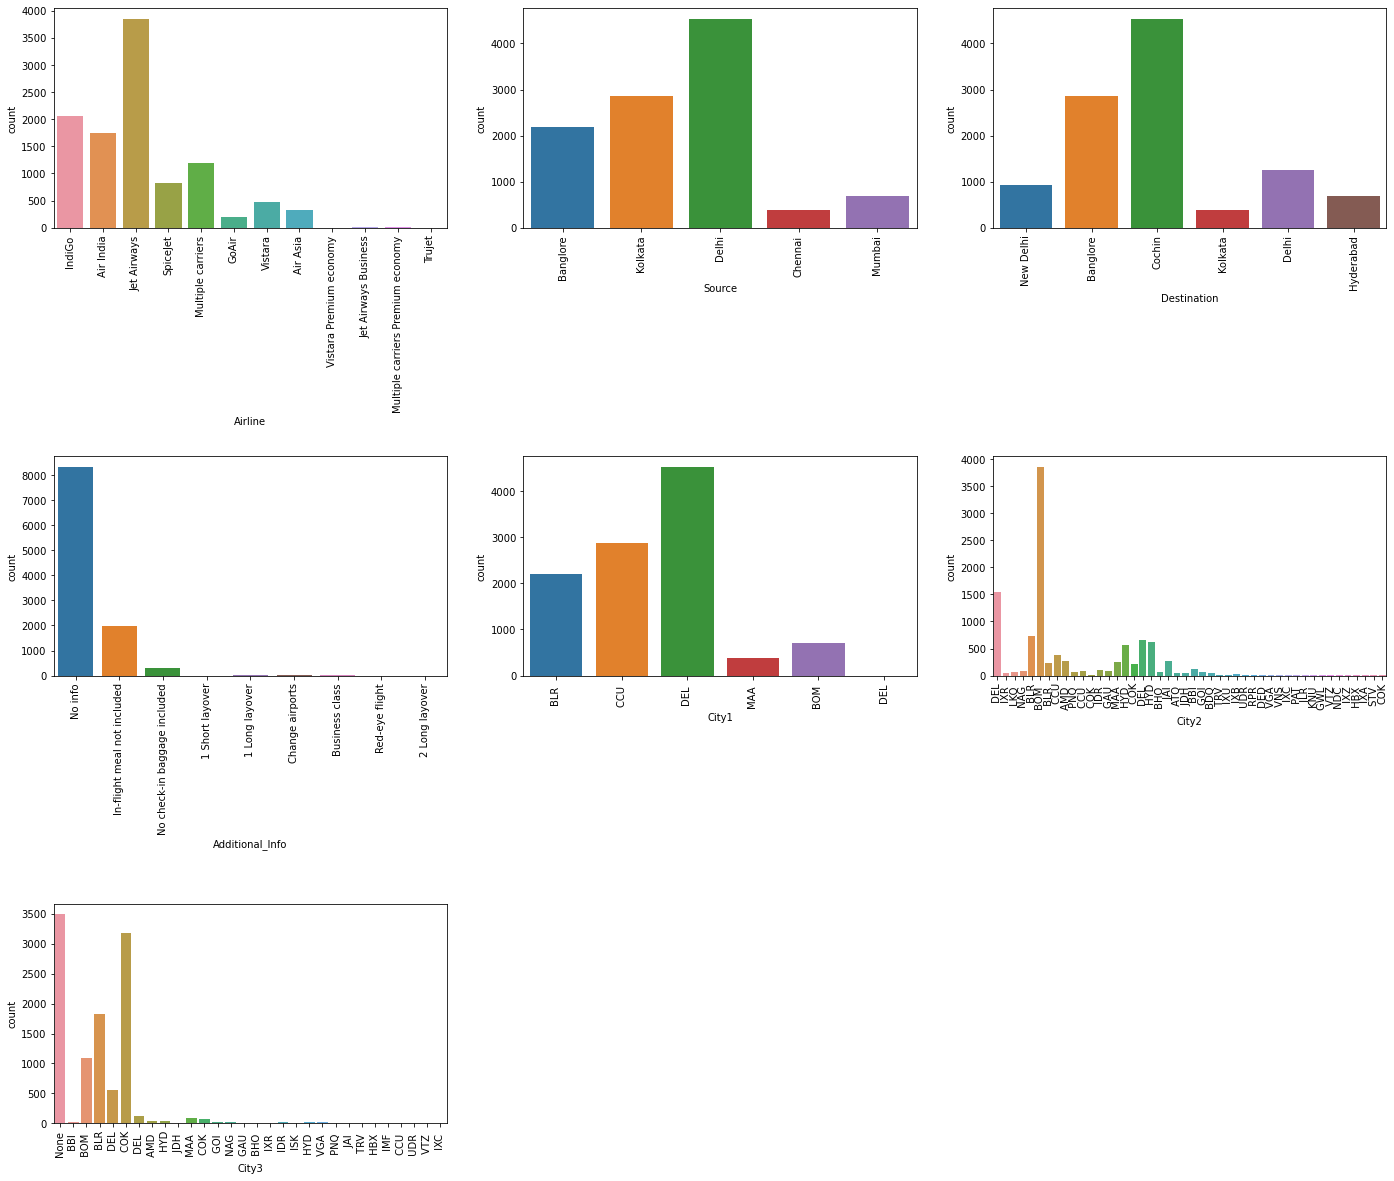

In [373]:
c=1
plt.figure(figsize=(20,35))

for i in categories:
    plt.subplot(6,3,c)
    sns.countplot(flight[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad= 3.0)
    c=c+1
plt.show()    

## We make the below mentioned observations using the plots above –
### Airlines
1.Jet Airways is the most preferred airline with the highest row count,
followed by Indigo and AirIndia.

2.Count for Vistara Premium economy, Trujet, Multiple carries premium
economy and Jet airways business is quite low.
### Source
1.Majority of the flights take off from Delhi

2.Chennai has the minimum count of flight take-offs
### Destination
1.Maximum flights land in Cochin

2.Kolkata has the lowest count of receiving the flight
Additional Info

3.Maximum rows have No info as the value.
We need to check how this column impacts the prices
### City1
1.City1 has same data as source column

2.An additional value has been observed for ‘ DEL’, there is an extra Space
in the name, count for this is very low. We will merge this with ‘DEL’.
### City2
1.Majority of the flights take a stop in Bombay.

2.There are many cities with a very low count for stops. We will check how
flights with 1stop impact prices of flights, and if any relation is there
with stop place.
### City3
1.Majority of the flights have no 2nd stop

2.If there is a second stop, chances are high of the place being Cochin.

## Now we plot for numerical data

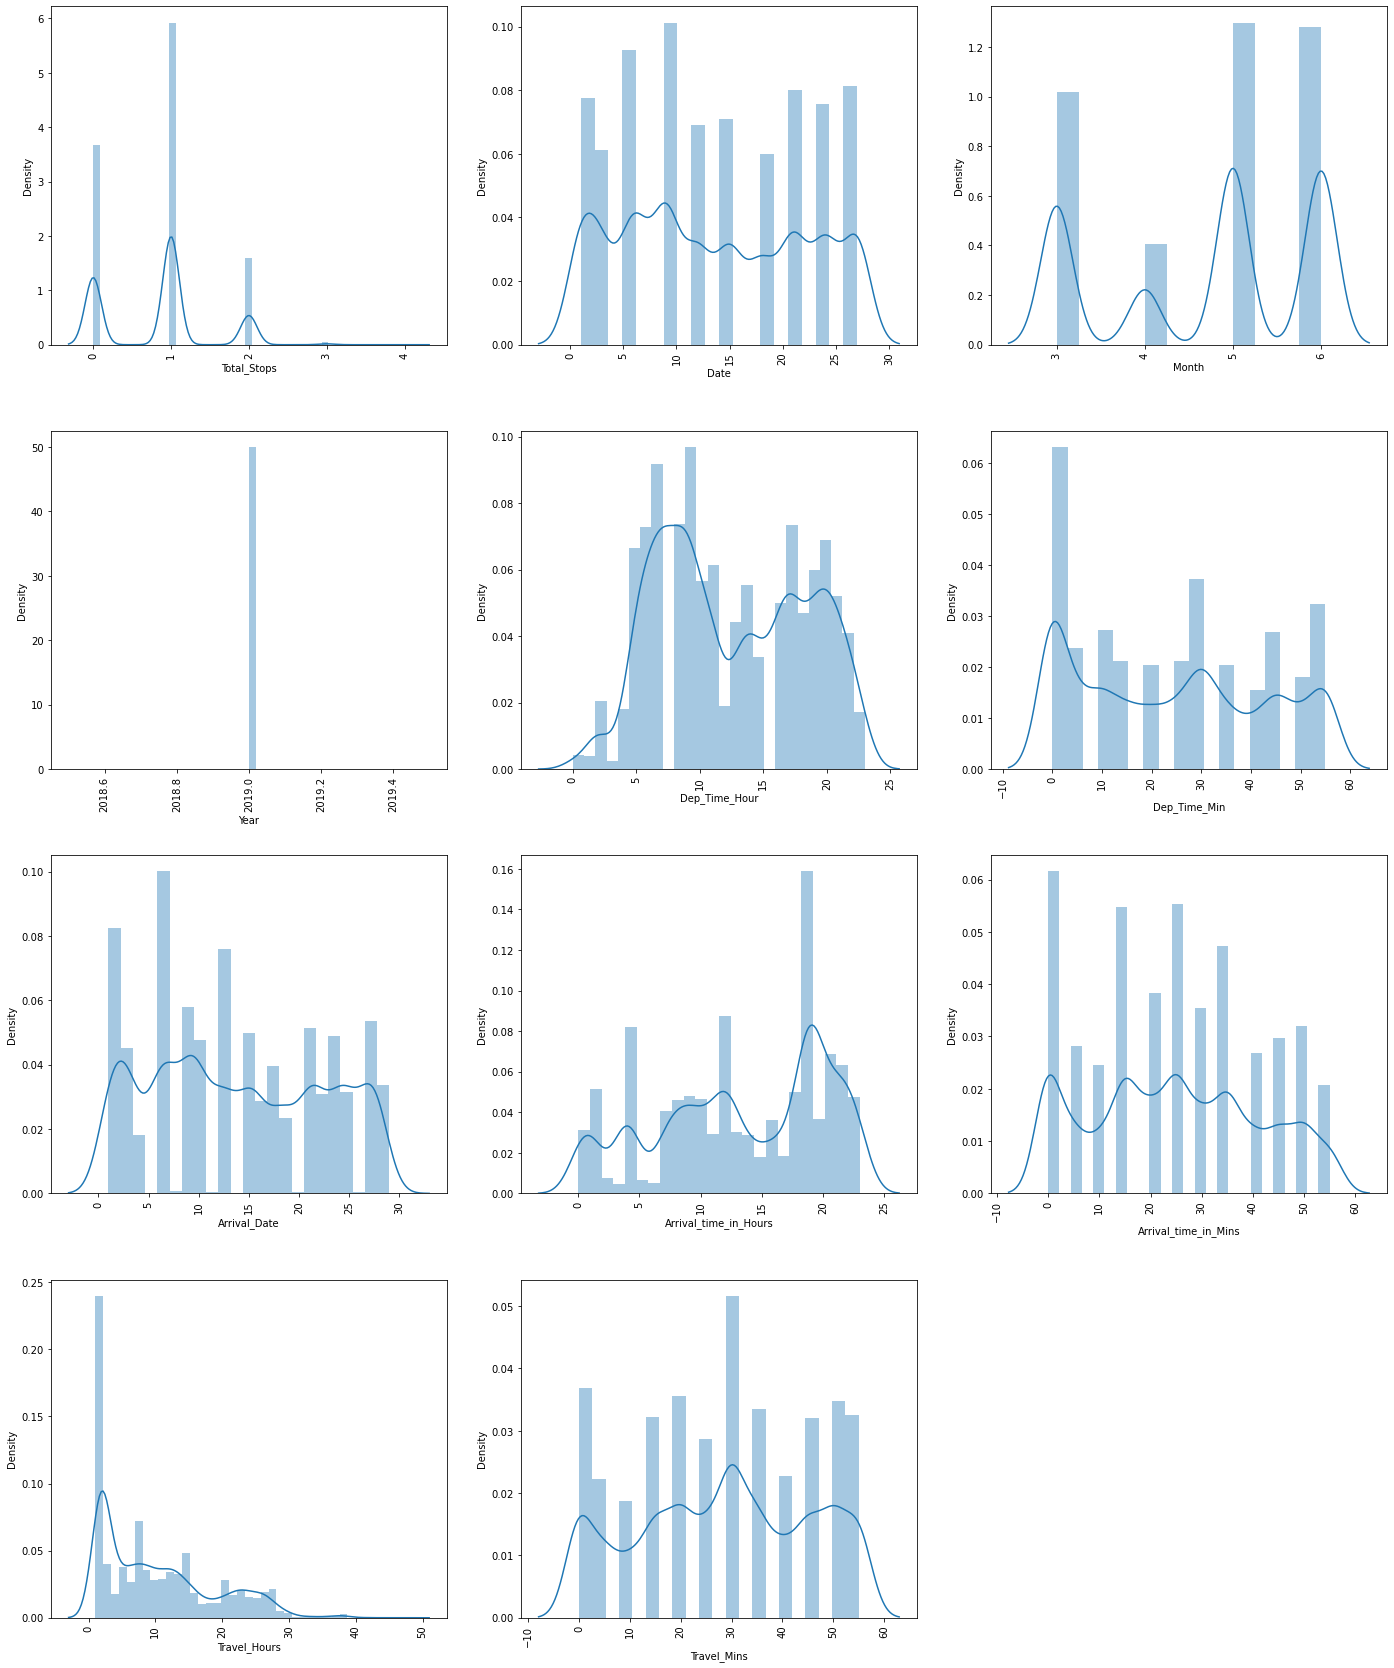

In [374]:
c=1
plt.figure(figsize=(20,35))

for i in numerical:
    plt.subplot(6,3,c)
    sns.distplot(flight[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad= 3.0)
    c=c+1
plt.show()

## We make the below observations from the numerical data –
### Total stops
Majority of the flights have stops as 1, flights with 3 and 4 stops are
quite low
### Date
There are no specific dates when the flights travel; the distribution is
almost similar for all dates
### Month
1.People tend to travel less in April

2.Flights in May and June have a higher count, seems like people travel
during holiday months
### Year
This column has only 2019 as a value and can be dropped
### Dep_Time_Hour
1.Majority of the flights tend to fly in the early morning time

2.Count of flights taking off during 16:00 - 23:00 is also high, Afternoon
flights are less in number.
### Dep_Time_Min
Most flights take off at whole hours (Mins as 00)
### Arrival date
In majority of the cases, flights take off and land on the same day
### Arrival time hour
1.Majority of the flights reach its destination in the evening time around
18:00-19:00

2.This seems to be because majority of the flights have take-off times in
the morning and hence land after in the evening
### Arrival time min
This distribution is similar and does not give out any dedicated
information
### Travel hours
1.Majority of the flights have travel time for around 2-3 hours, which
seems ok since these are domestic flights

2.Some flights have time around 30 hours too, this could be because of the
number of stops in between
### Travel mins
- The data is divided and is not pointing towards any specific points

<AxesSubplot:xlabel='Price', ylabel='Density'>

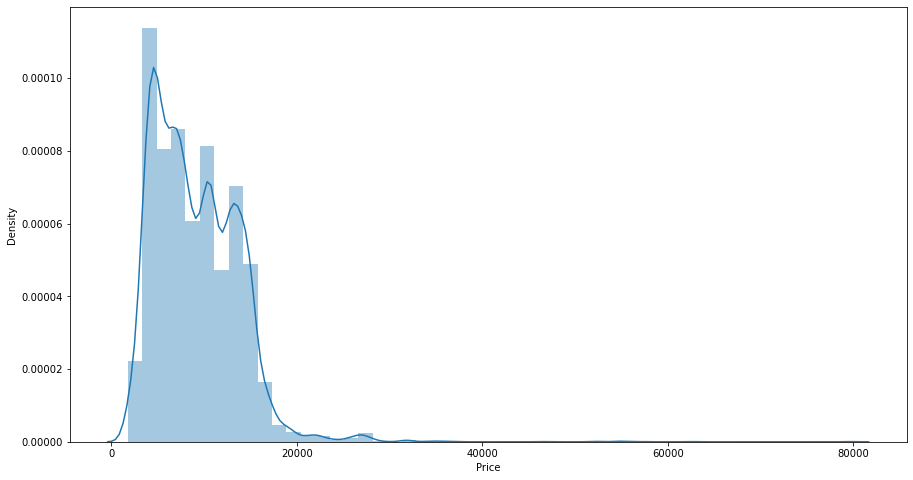

In [375]:
plt.figure(figsize=(15,8))
sns.distplot(flight.Price)

## Distibution of ‘Price’ column
1. The price column contains the minimum value as 1759 and maximum
value as 79512. 
2.Majority of the flights have price range between 1759–20k,
and number of flights having prices greater than 20k are quite less.
3.Price range is skewed towards right.

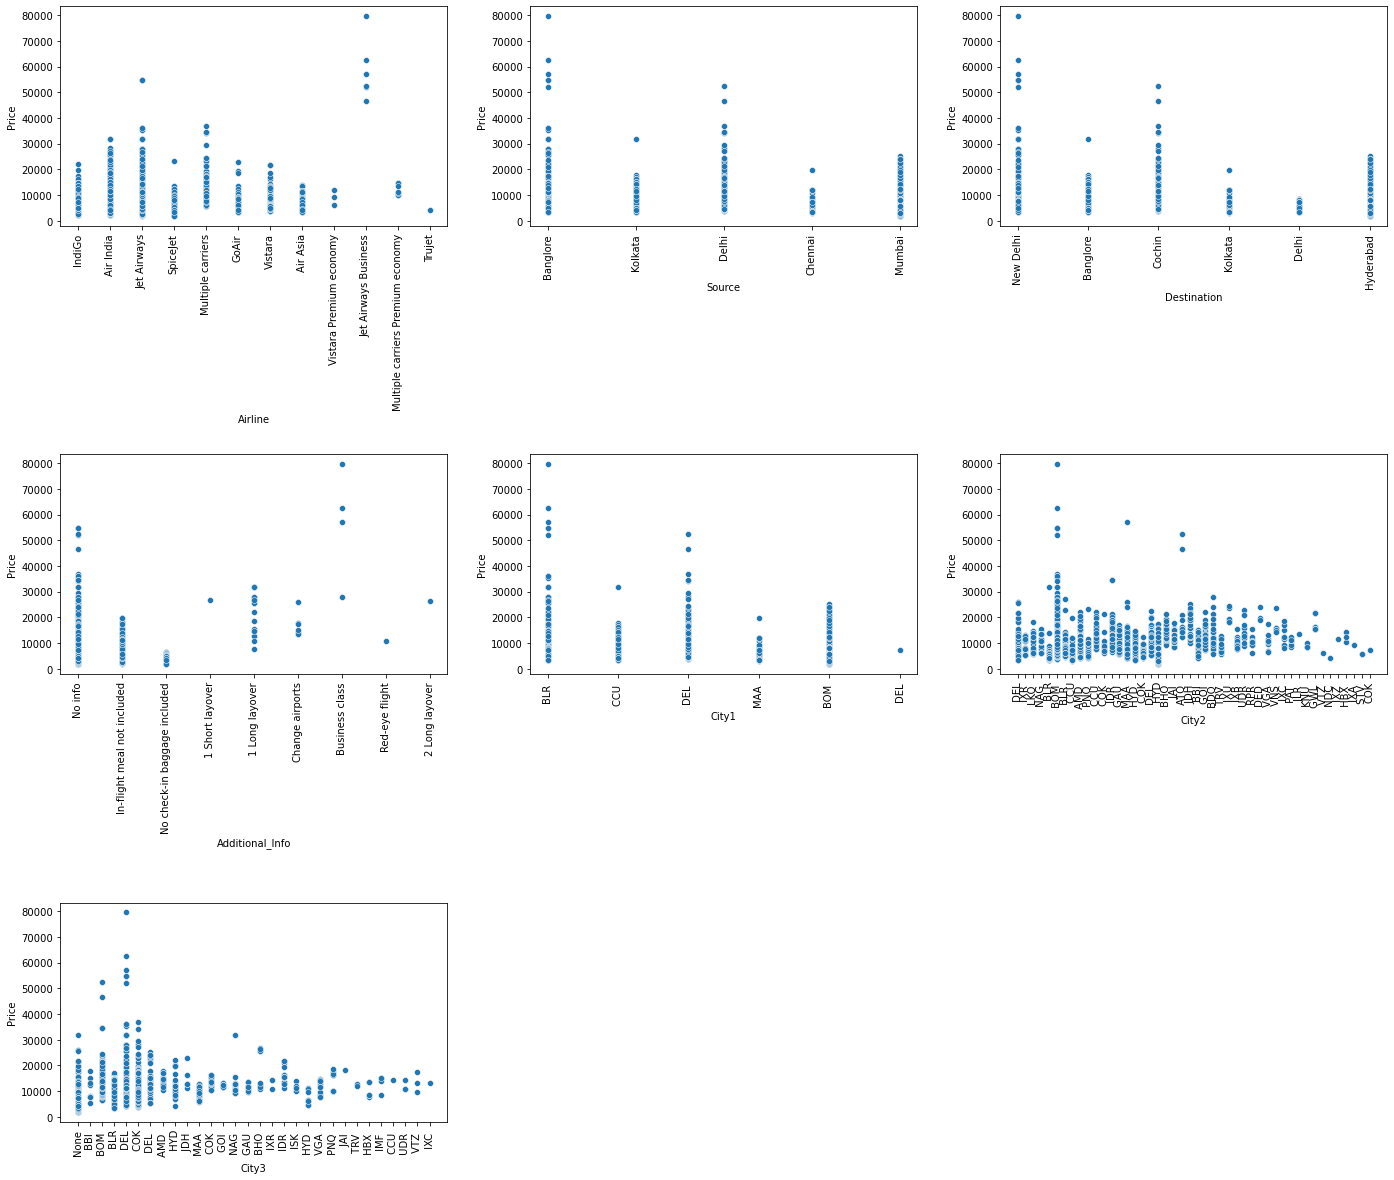

In [376]:
c=1
plt.figure(figsize=(20,35))

for i in categories:
    plt.subplot(6,3,c)
    sns.scatterplot(x=flight[i], y=flight['Price'])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad= 3.0)
    c=c+1
plt.show()

## We will now compare the independent features with ‘Price’ column, to check the impact on ‘Price’
### We make the following observations –
1.Jet airways business class has the highest prices between 50k — 80k

2.All the high cost flights depart from bangalore, rest of the flights have
prices between 3k — 50k

3.All high cost flights have destination as Delhi, rest of the flights have prices
between 3k — 50k

4.If a flight is of business class, its price would be high

5.The flights with high prices having 1 stop, have stop in Bombay

6.Flights with 2 stops, having higher prices, have stop in Delhi.

7.We have quite less data where prices are higher than 50k. We check these
rows once 

In [377]:
flight[flight['Price']>=50000]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Time_of_Arrival,Arrival_time_in_Hours,Arrival_time_in_Mins,Travel_Hours,Travel_Mins
657,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,"[05, 45]",[10:45],[5h],1,No info,52229,...,BOM,DEL,5,45,1,"[10, 45]",10,45,5,0
1478,Jet Airways,"[18, 03, 2019]",Banglore,New Delhi,"[18, 40]","[00:45, 16, Mar]","[6h, 5m]",1,No info,54826,...,BOM,DEL,18,40,16,"[00, 45]",0,45,6,5
2618,Jet Airways,"[18, 03, 2019]",Banglore,New Delhi,"[22, 50]","[05:05, 16, Mar]","[6h, 15m]",1,No info,54826,...,BOM,DEL,22,50,16,"[05, 05]",5,5,6,15
2924,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,"[05, 45]",[11:25],"[5h, 40m]",1,Business class,79512,...,BOM,DEL,5,45,1,"[11, 25]",11,25,5,40
5372,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,"[05, 45]",[12:25],"[6h, 40m]",1,Business class,62427,...,BOM,DEL,5,45,1,"[12, 25]",12,25,6,40
5439,Jet Airways,"[01, 03, 2019]",Banglore,New Delhi,"[16, 55]",[23:00],"[6h, 5m]",1,No info,54826,...,BOM,DEL,16,55,1,"[23, 00]",23,0,6,5
9715,Jet Airways Business,"[6, 03, 2019]",Delhi,Cochin,"[20, 05]","[04:25, 07, Mar]","[8h, 20m]",2,No info,52285,...,ATQ,BOM,20,5,7,"[04, 25]",4,25,8,20
10364,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,"[09, 45]",[14:25],"[4h, 40m]",1,Business class,57209,...,MAA,DEL,9,45,1,"[14, 25]",14,25,4,40


### We make the below observations –
1.We observe that the flights with high prices are 8 in number.

2.Majority of these flights fly from the same route — BLR->BOM->DEL

3.Majority of the flights belong to Business class

4.All the flights have Airlines as Jet airways.

5.All of these flights took flight in March.


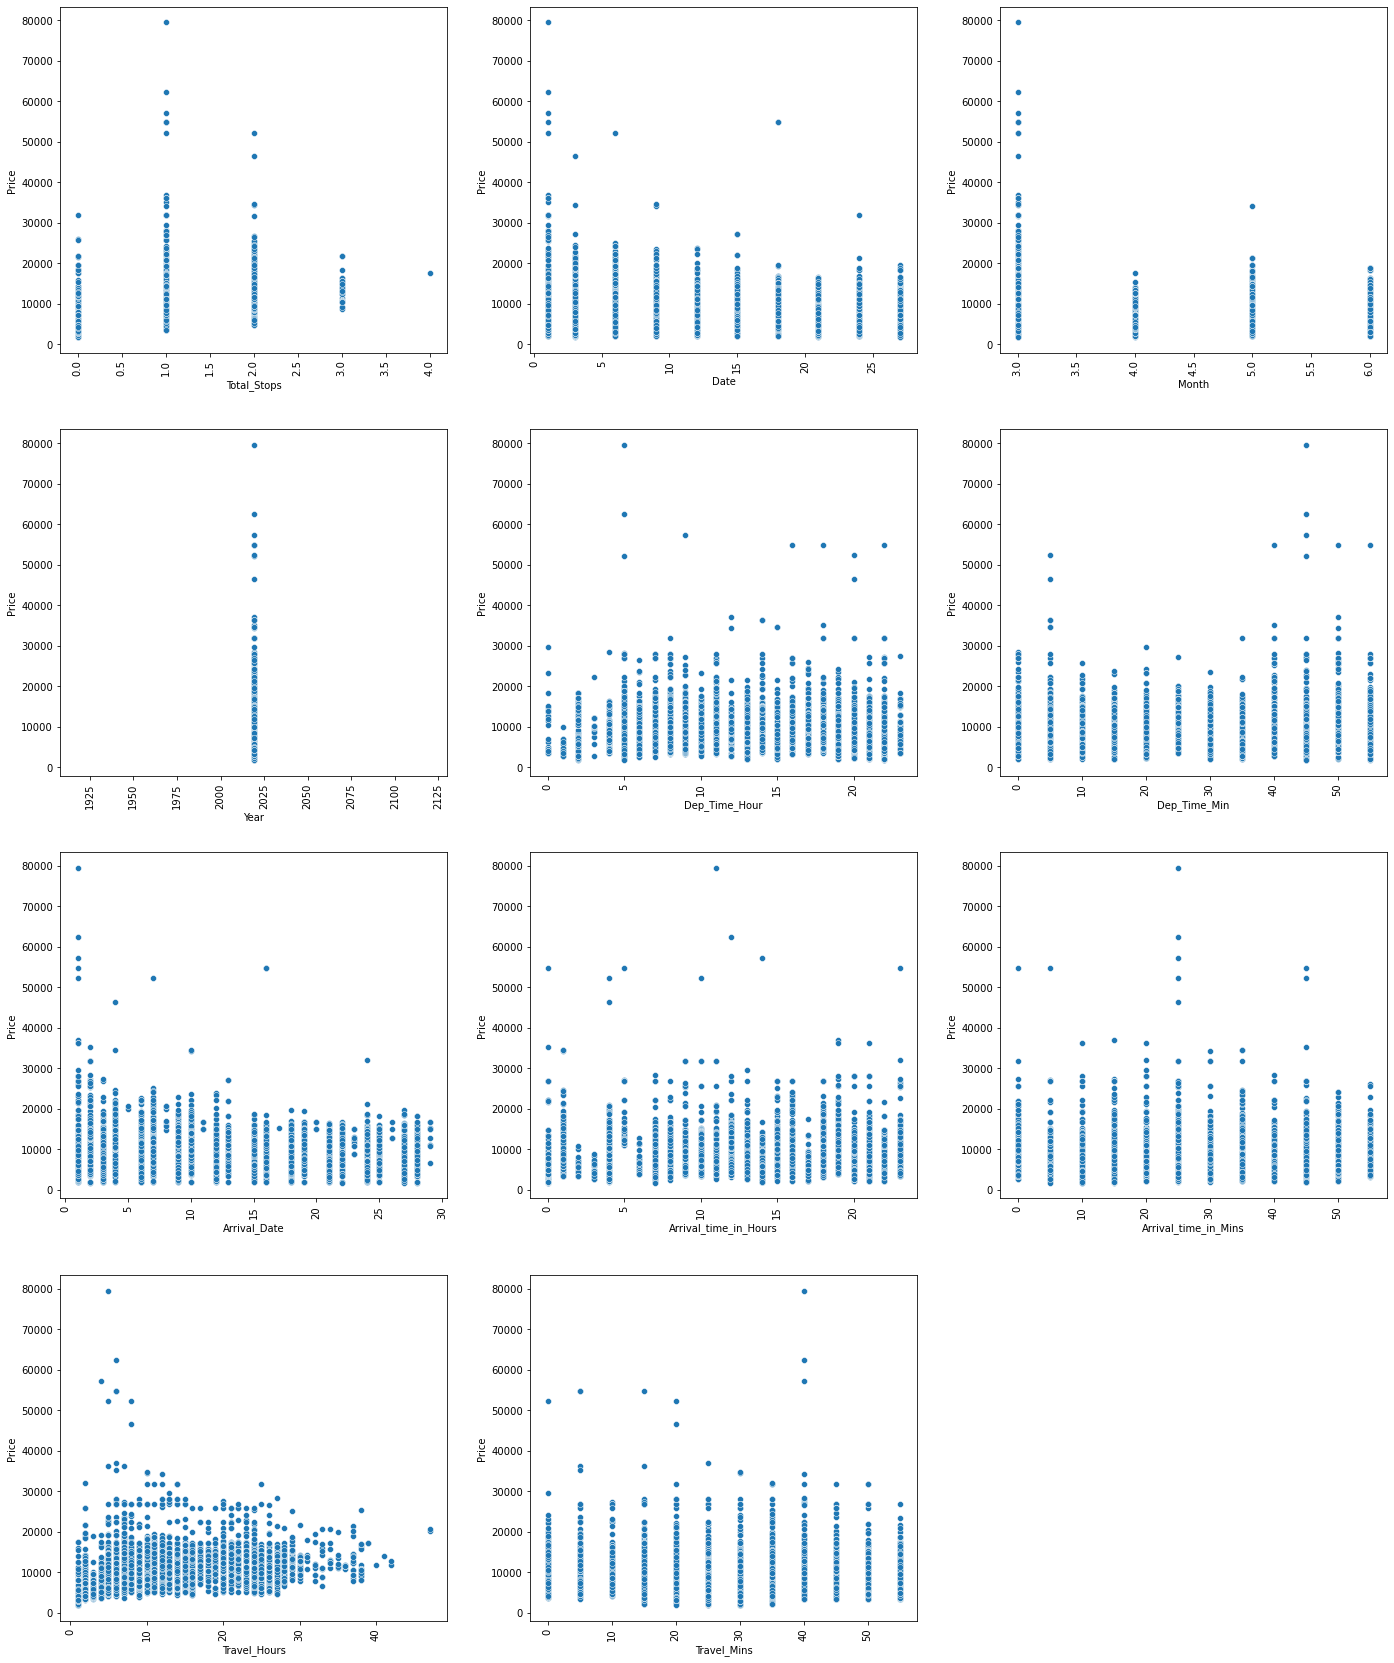

In [378]:
c=1
plt.figure(figsize=(20,35))

for i in numerical:
    plt.subplot(6,3,c)
    sns.scatterplot(x=flight[i], y=flight['Price'])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad= 3.0)
    c=c+1
plt.show()

### We now proceed with checking the relation of ‘Price’ column with numerical data –
#### We observe that –
1.As number of stops increase, the price range gets decreasing into a smaller
price window (10k — 22k)

2.High price flights are lesser during end of month
3.Prices are higher in the month of March
4.With increase in travel hours, price increases, but the number of flights
decrease.
### After the above analysis, we drop the non-required columns, which we feel have no impact on prices of flights.
#####  These columns include
‘Dep_Time_Min’,’Arrival_Time_Min’,’Travel_mins’,’Year’, ‘City1’.
##### We now have our final dataset with 10682 rows and 14 columns (including ‘Price’ column).

In [379]:
flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Time_of_Arrival,Arrival_time_in_Hours,Arrival_time_in_Mins,Travel_Hours,Travel_Mins
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[22, 20]","[01:10, 22, Mar]","[2h, 50m]",0,No info,3897,...,DEL,None,22,20,22,"[01, 10]",1,10,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[05, 50]",[13:15],"[7h, 25m]",2,No info,7662,...,IXR,BBI,5,50,1,"[13, 15]",13,15,7,25


In [380]:
flight.drop('Dep_Time_Min',axis=1, inplace=True)

In [381]:
flight.drop('Travel_Mins',axis=1 ,inplace=True)
flight.drop('Year', axis=1 ,inplace=True)
flight.drop('City1', axis=1 ,inplace=True)

In [382]:
flight.drop('Arrival_time_in_Mins', axis=1,inplace=True)

In [383]:
flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_Date,Time_of_Arrival,Arrival_time_in_Hours,Travel_Hours
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[22, 20]","[01:10, 22, Mar]","[2h, 50m]",0,No info,3897,24,3,DEL,None,22,22,"[01, 10]",1,2
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[05, 50]",[13:15],"[7h, 25m]",2,No info,7662,1,5,IXR,BBI,5,1,"[13, 15]",13,7


In [384]:
flight.shape

(10682, 19)

In [385]:
flight.drop('Date_of_Journey', axis=1,inplace=True)
flight.drop('Dep_Time', axis=1,inplace=True)
flight.drop('Arrival_Time', axis=1,inplace=True)
flight.drop('Time_of_Arrival', axis=1,inplace=True)
flight.drop('Duration', axis=1,inplace=True)

In [386]:
flight.shape

(10682, 14)

In [387]:
flight.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_Date,Arrival_time_in_Hours,Travel_Hours
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,DEL,None,22,22,1,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,IXR,BBI,5,1,13,7
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,LKO,BOM,9,10,4,19
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,NAG,BLR,18,12,23,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,NAG,DEL,16,1,21,4


In [388]:
numericals_remain =['Total_Stops','Price','Date','Month','Dep_Time_Hour','Arrival_Date','Arrival_time_in_Hours','Travel_Hours']

In [389]:
numericals_remain

['Total_Stops',
 'Price',
 'Date',
 'Month',
 'Dep_Time_Hour',
 'Arrival_Date',
 'Arrival_time_in_Hours',
 'Travel_Hours']

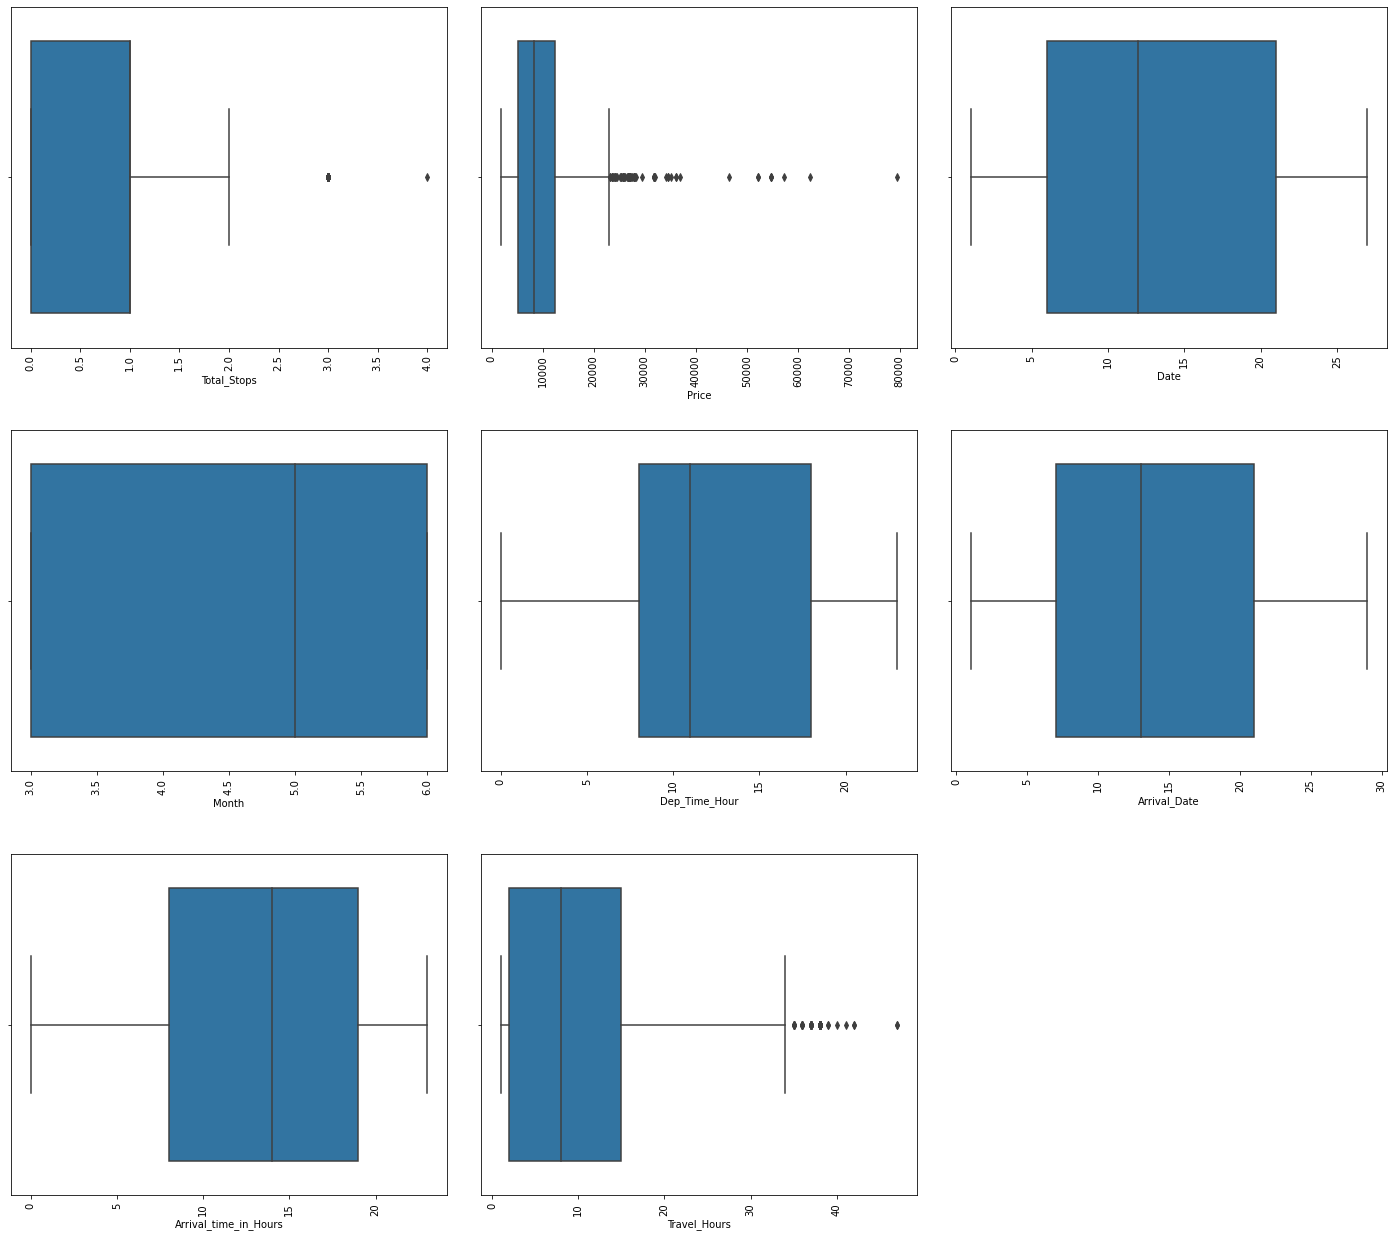

In [390]:
c=1
plt.figure(figsize=(20,35))

for i in numericals_remain:
    plt.subplot(6,3,c)
    sns.boxplot(flight[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad= 3.0)
    c=c+1
plt.show()

### We make the below conclusions –
1.Outliers are present in Travel_hours, Total_Stops and price

2.We will not remove outliers from total stops since price is impacted by
number of stops

3.We will not remove the data with high number of hours, increase in
number of hours shows a price pattern in the above graphs plotted for EDA.


### Skewness Treatment
We now proceed with treating skewness in our data, which allows us to fit
our data in a symmetric distribution, which further allows our model to
learn better.


In [391]:
flight.skew()

Total_Stops              0.317345
Price                    1.813248
Date                     0.118174
Month                   -0.387708
Dep_Time_Hour            0.113224
Arrival_Date             0.119667
Arrival_time_in_Hours   -0.369876
Travel_Hours             0.850822
dtype: float64

In [392]:
# anything out of range from -0.5 to +0.5  need to be treated , since price target column we wont treat it but for travel_hours 
# we need to treat it 

In [393]:
# we will use log transform to remove skewness

In [394]:
flight.Travel_Hours = np.log(flight.Travel_Hours)
flight.Travel_Hours.skew()

-0.26612233332369917

 We have successfully treatedskewness from our data. 
### We will now proceed to ‘Encoding’ step.
1.Encoding the categorical data

2.We encode the categorical data in this step, to convert it to integer type,
since the model does not work on ‘string’ data. We use ‘Label Encoder’ to
achieve the desired results 

In [395]:
np.isnan(flight.any())
np.isfinite(flight.all())

flight = flight.reset_index()

In [396]:
#np.any(np.isnan(flight))
#np.all(np.isfinite(flight))

In [397]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [398]:
for i in flight.columns:
    if flight[i].dtypes == 'object':
        print(i)
        flight[i]= le.fit_transform(flight[i])

Airline
Source
Destination
Additional_Info
City2
City3


In [399]:
#transfor look like this
flight.head()

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_Date,Arrival_time_in_Hours,Travel_Hours
0,0,3,0,5,0,7,3897,24,3,13,29,22,22,1,0.693147
1,1,1,3,0,2,7,7662,1,5,25,1,5,1,13,1.945910
2,2,4,2,1,2,7,13882,9,6,32,4,9,10,4,2.944439
3,3,3,3,0,1,7,6218,12,5,34,3,18,12,23,1.609438
4,4,3,0,5,1,7,13302,1,3,34,8,16,1,21,1.386294


### Scaling the data
1.The next step is to bring the data to a common scale, since there are certain
columns with very small values and some columns with high values.
2.This process is important as values on a similar scale allow the model to learn
better.
## We use standard scaler for this process –
1.‘StandardScaler follows Standard Normal Distribution (SND). Therefore, it
makes mean = 0 and scales the data to unit variance’

In [400]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [401]:
s_x = flight.drop('Price', axis=1)
y = flight.Price

In [402]:
dataset = sc.fit_transform(s_x)
x = pd.DataFrame(dataset,columns=s_x.columns)

In [403]:
x

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City2,City3,Dep_Time_Hour,Arrival_Date,Arrival_time_in_Hours,Travel_Hours
0,-1.731784,-0.410805,-1.658435,2.416778,-1.220477,0.498649,1.237288,-1.467707,0.137204,1.395015,1.654268,0.955750,-1.800319,-1.183304
1,-1.731460,-1.261152,0.890299,-0.973732,1.741835,0.498649,-1.475307,0.250153,1.634890,-1.082280,-1.303000,-1.524648,-0.050813,0.052178
2,-1.731136,0.014369,0.040721,-0.295630,1.741835,0.498649,-0.531796,1.109082,2.508541,-0.816856,-0.607172,-0.461621,-1.362943,1.036933
3,-1.730811,-0.410805,0.890299,-0.973732,0.260679,0.498649,-0.177979,0.250153,2.758155,-0.905330,0.958440,-0.225392,1.407109,-0.279653
4,-1.730487,-0.410805,-1.658435,2.416778,0.260679,0.498649,-1.475307,-1.467707,2.758155,-0.462956,0.610527,-1.524648,1.115525,-0.499718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1.730556,-1.686326,0.890299,-0.973732,-1.220477,0.498649,-0.531796,-0.608777,-0.861254,1.395015,1.132397,-0.579735,1.261317,-1.183304
10678,1.730880,-1.261152,0.890299,-0.973732,-1.220477,0.498649,1.591104,-0.608777,-0.861254,1.395015,1.306354,1.546321,1.407109,-1.183304
10679,1.731204,0.014369,-1.658435,0.382472,-1.220477,0.498649,1.591104,-0.608777,0.137204,1.395015,-0.781129,1.546321,-0.342397,-0.783432
10680,1.731529,2.565411,-1.658435,2.416778,-1.220477,0.498649,-1.475307,-1.467707,0.137204,1.395015,-0.259258,-1.524648,0.094979,-1.183304


### Fitting the Regression models
1.We now proceed to the main step of our machine learning, fitting the model
and predicting the outputs.
2.We fit the data into multiple regression models to compare the performance of all models and select the best model –


In [404]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [405]:
#We use the below mentioned code snipped to fit the data into ML models
#and predict the output 

In [406]:
dt=DecisionTreeRegressor()
#rf=RandomForestRegressor()
knn=KNeighborsRegressor()
lr=LinearRegression()
svr=SVR()

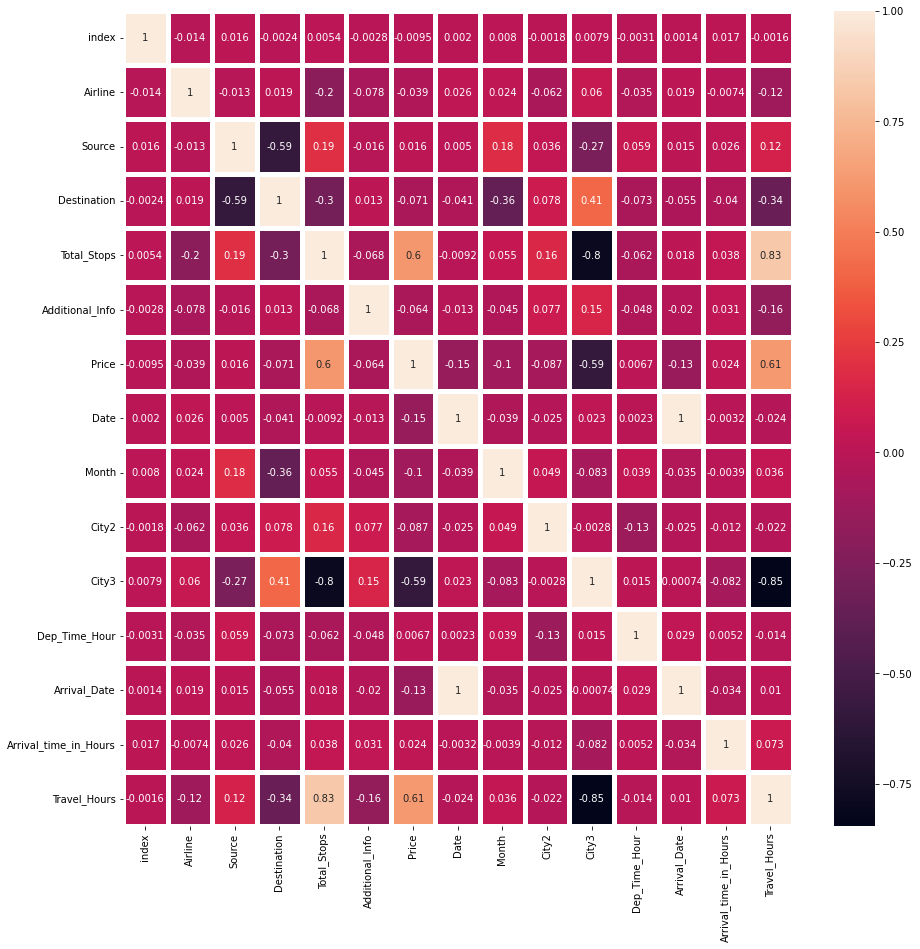

In [407]:
plt.figure(figsize=(15,15))
sns.heatmap(flight.corr(),linewidths=5 , annot=True);

In [408]:
flight.corr()

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_Date,Arrival_time_in_Hours,Travel_Hours
index,1.000000,-0.014021,0.015554,-0.002394,0.005390,-0.002845,-0.009503,0.002029,0.008049,-0.001825,0.007904,-0.003083,0.001383,0.016979,-0.001602
Airline,-0.014021,1.000000,-0.013198,0.018607,-0.199061,-0.077741,-0.039318,0.026137,0.024474,-0.061792,0.060289,-0.035125,0.018772,-0.007446,-0.123580
Source,0.015554,-0.013198,1.000000,-0.592862,0.192593,-0.015940,0.015711,0.005043,0.183551,0.035756,-0.271377,0.058954,0.014608,0.025573,0.123579
Destination,-0.002394,0.018607,-0.592862,1.000000,-0.295651,0.013040,-0.071304,-0.040914,-0.364596,0.077664,0.410010,-0.073045,-0.055461,-0.039751,-0.342835
Total_Stops,0.005390,-0.199061,0.192593,-0.295651,1.000000,-0.067943,0.603776,-0.009206,0.054603,0.161587,-0.800594,-0.061511,0.018008,0.038151,0.833236
Additional_Info,-0.002845,-0.077741,-0.015940,0.013040,-0.067943,1.000000,-0.063862,-0.012798,-0.045391,0.077008,0.148063,-0.048133,-0.020233,0.031119,-0.162619
Price,-0.009503,-0.039318,0.015711,-0.071304,0.603776,-0.063862,1.000000,-0.153619,-0.103431,-0.087404,-0.591567,0.006718,-0.134527,0.024203,0.614039
Date,0.002029,0.026137,0.005043,-0.040914,-0.009206,-0.012798,-0.153619,1.000000,-0.038505,-0.025021,0.022748,0.002271,0.997449,-0.003160,-0.023833
Month,0.008049,0.024474,0.183551,-0.364596,0.054603,-0.045391,-0.103431,-0.038505,1.000000,0.048542,-0.083010,0.039201,-0.034689,-0.003889,0.036121
City2,-0.001825,-0.061792,0.035756,0.077664,0.161587,0.077008,-0.087404,-0.025021,0.048542,1.000000,-0.002803,-0.126378,-0.025472,-0.012478,-0.022022


In [409]:
x_train.shape


(7477, 14)

In [410]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [411]:
y_train.shape

(7477,)

In [412]:
x_test.shape

(3205, 14)

In [413]:
y_test.shape

(3205,)

In [414]:
#training a model

In [415]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7477 entries, 749 to 7270
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7477 non-null   float64
 1   Airline                7477 non-null   float64
 2   Source                 7477 non-null   float64
 3   Destination            7477 non-null   float64
 4   Total_Stops            7477 non-null   float64
 5   Additional_Info        7477 non-null   float64
 6   Date                   7477 non-null   float64
 7   Month                  7477 non-null   float64
 8   City2                  7477 non-null   float64
 9   City3                  7477 non-null   float64
 10  Dep_Time_Hour          7477 non-null   float64
 11  Arrival_Date           7477 non-null   float64
 12  Arrival_time_in_Hours  7477 non-null   float64
 13  Travel_Hours           7477 non-null   float64
dtypes: float64(14)
memory usage: 876.2 KB


In [416]:
y_train.isnull().sum()

0

In [417]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [418]:
for i in [dt, svr, lr, knn]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print('r2_score is',test_score)
        print('r2_score for train data',train_score)
        print('mean absoulte error', mean_absolute_error(y_test,pred))
        print('mean squared error', mean_squared_error(y_test,pred))
        print('root mean squared error', (mean_squared_error(y_test,pred, squared=False )))
        print('               ')
        print('                       ')
    
    

SVR()
r2_score is 0.054302264499369035
r2_score for train data 0.04821570491543292
mean absoulte error 3380.2115310431764
mean squared error 19143731.01208789
root mean squared error 4375.354958410562
               
                       
LinearRegression()
r2_score is 0.5137641858387855
r2_score for train data 0.48859810765830824
mean absoulte error 2266.974270978279
mean squared error 9842857.062376497
root mean squared error 3137.332794329683
               
                       
KNeighborsRegressor()
r2_score is 0.766951893422723
r2_score for train data 0.8183499042612968
mean absoulte error 1311.3390951638064
mean squared error 4717585.860380655
root mean squared error 2172.0004282643813
               
                       


#### knn performing well compare with other model ,with the accuracy of 76%

In [419]:
# now will try to apply for assemble model

In [420]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


In [421]:
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
gb = GradientBoostingRegressor()


In [422]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
for i in [rf,ab,gb]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print(i)
        print('r2_score is',test_score)
        print('r2_score for train data',train_score)
        print('mean absoulte error', mean_absolute_error(y_test,pred))
        print('mean squared error', mean_squared_error(y_test,pred))
        print('root mean squared error', (mean_squared_error(y_test,pred, squared=False )))
        print('               ')
        print('                       ')
    

RandomForestRegressor()
r2_score is 0.866853241044863
r2_score for train data 0.9799745345546681
mean absoulte error 742.6981372854914
mean squared error 2666888.183865117
root mean squared error 1633.0609859601439
               
                       
AdaBoostRegressor()
r2_score is 0.1426104889283698
r2_score for train data 0.2643889924545375
mean absoulte error 3469.6610361219805
mean squared error 17173245.327115055
root mean squared error 4144.061453105523
               
                       
GradientBoostingRegressor()
r2_score is 0.8115199622929505
r2_score for train data 0.8528713136719137
mean absoulte error 1216.0268187672407
mean squared error 3775196.553036254
root mean squared error 1942.9865035651312
               
                       


### We make the below observations –
1.Random Forest model gives us the best accuracy, with an R2 score of 86.3%,
but the model is overfitting on train data.

2.We will try to tune this model to check if we can remove overfitting.

3.Mean Absolute error for this model is ~741 and RMSE ~ 1654.

4.Gradient boosting also gives a score of 81%, which is better than KNeighbors and the model is not overfitting as well.

5.The model has mean absolute error as ~1215 and RMSE as ~1942 (near to
Random forest )

### Cross Validation
1.We perform the cross validation of our model to check if the model has any
overfitting issue, by checking the ability of the model to make predictions
on new data, using k-folds. We test the cross validation for Random forest
and Gradient Boosting Regressor.

In [423]:
from sklearn.model_selection import cross_val_score 

In [424]:
for i in range (2,9):
    cv = cross_val_score(rf,x,y, cv=i)
    print(rf, cv.mean())

RandomForestRegressor() 0.8106452881547642
RandomForestRegressor() 0.8098886350212483
RandomForestRegressor() 0.8575017434345913
RandomForestRegressor() 0.8697933374040975
RandomForestRegressor() 0.8643617057000111
RandomForestRegressor() 0.8750212456056483
RandomForestRegressor() 0.8658274088489608


In [425]:
for i in range (2,9):
    cv = cross_val_score(gb,x,y, cv=i)
    print(gb, cv.mean())

GradientBoostingRegressor() 0.8033592674509004
GradientBoostingRegressor() 0.78635790566139
GradientBoostingRegressor() 0.8281615168387896
GradientBoostingRegressor() 0.8299343946219453
GradientBoostingRegressor() 0.825390332819601
GradientBoostingRegressor() 0.8236802386709906
GradientBoostingRegressor() 0.8294045230870619


#### The Random Forest Regressor provides us a cross validation score of 87%, and gradient boosting regressor gives a score of 82%. We will hypertune both the models to check if our accuracy improves.
### Hypertuning the model
1.GridSearch CV is a technique used to validate the model with different
parameter combinations, by creating a grid of parameters and trying all the
combinations to compare which combination gave the best results. 
2.We apply grid search on our model –


In [426]:
from sklearn.model_selection import GridSearchCV

In [427]:
param_grid= {'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_samples':[50,100,250,500,1000],
'min_samples_split':[2,4,10]}
gcv_rf = GridSearchCV(rf, param_grid, cv=3)

In [428]:
# fitting a model
res = gcv_rf.fit(x_train,y_train)

In [429]:
res.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 100}

In [430]:
param_grid2= {'alpha':[0.9,0.09,0.1],'learning_rate':[0.1,0.01], 'max_depth':[3,4,5],'min_samples_leaf':[2,3,4],
'min_samples_split':[1,2,3],'n_estimators':[100,50,10]}

In [431]:
gcv_gb = GridSearchCV(gb, param_grid2, cv=3)

In [432]:
#res1 = gcv_gb.fit(x_train,y_train)

In [433]:
res1.best_params_

{'alpha': 0.09,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [434]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)
model1=RandomForestRegressor(max_depth= None,
 max_samples= 1000,
 min_samples_split= 2,
 n_estimators=70)

In [435]:
model1.fit(x_train,y_train)

RandomForestRegressor(max_samples=1000, n_estimators=70)

In [436]:
predt1=model1.predict(x_test)

In [437]:
from sklearn.metrics import r2_score
r2_score(y_test,predt1)

0.8595435504609332

In [438]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
model2=GradientBoostingRegressor(alpha= 0.09,
 learning_rate= 0.1,
 max_depth= 5,
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 100)

In [439]:
model2.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.09, max_depth=5, min_samples_leaf=2)

In [440]:
predt2=model2.predict(x_test)

In [441]:
from sklearn.metrics import r2_score
r2_score(y_test,predt2)

0.8573882572311923

In [579]:
predicted_value_test=pd.DataFrame({'actual': y_test, 'predicted_price': predt2})

In [580]:
predicted_value_test

,actual,predicted_price
8009,6270,5426.304863
4643,13244,13477.015464
3332,11098,11017.407656
3979,11386,11583.922634
5054,4392,3287.467099
...,...,...
856,15422,14032.964924
6082,5674,5751.453322
1593,10368,10957.062033
9837,4174,4108.795268


In [581]:
print('r2_score is',r2_score(y_test,predt2))
print('mean absoulte error', mean_absolute_error(y_test,predt2))
print('mean squared error', mean_squared_error(y_test,predt2))
print('root mean squared error', (mean_squared_error(y_test,predt2, squared=False )))
 

r2_score is 0.8573882572311923
mean absoulte error 992.7707931417428
mean squared error 2917146.6650038576
root mean squared error 1707.965651002343


In [442]:
import joblib

In [443]:
joblib.dump(model2, 'flight_prediction.obj')

['flight_prediction.obj']

## Conclusion
##### We further proceed to test the object that we saved using joblib, and create a dataframe of predicted values –
##### We receive the following metrics as our final metrics –
1.We have achieved an r2_score value of 87%, meaning that we are actually
able to predict values quite near to the actual prices, for majority of the
rows. 

In [444]:
model3=joblib.load('flight_prediction.obj')

## importing test data

In [530]:
test=pd.read_excel("C:/Users/mounika/Desktop/aug DS files/aug cls notes/aug PROJECT --/aug project 2,3/wetransfer(flight)_test_set-xlsx_2021-10-09_1422/flight_Test_set.xlsx")

In [531]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [532]:
#x_train.columns

In [533]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [534]:
test.Date_of_Journey = test['Date_of_Journey'].str.split('/')


In [535]:
test['Date']=test.Date_of_Journey.str[0]
test['Month']=test.Date_of_Journey.str[1]
test['Year']=test.Date_of_Journey.str[2]

In [536]:
test.Route=test.Route.str.split('→')

In [537]:
test['City1']=test.Route.str[0]
test['City2']=test.Route.str[1]
test['City3']=test.Route.str[2]

In [538]:
test.Dep_Time =test.Dep_Time.str.split(':')

In [539]:
test['Dep_Time_Hour'] =test.Dep_Time.str[0] 
test['Dep_Time_Min'] =test.Dep_Time.str[1]

In [540]:

test.Arrival_Time = test.Arrival_Time.str.split(' ')
test['Arrival_Date'] = test.Arrival_Time.str[1]
test['Time_of_Arrival']=test.Arrival_Time.str[0] 
test['Time_of_Arrival']= test.Time_of_Arrival.str.split(':')
test['Arrival_time_in_Hours'] = test.Time_of_Arrival.str[0]
test['Arrival_time_in_Mins'] = test.Time_of_Arrival.str[1]


In [541]:
test.Duration = test.Duration.str.split(' ')

In [542]:

#test.Duration = test['Duration'].str.split(' ')
test['Travel_Hours']= test.Duration.str[0]
test['Travel_Hours']= test['Travel_Hours'].str.split('h')
test['Travel_Hours']=test['Travel_Hours'].str[0]
test.Travel_Hours=test.Travel_Hours
test['Travel_Mins']=test.Duration.str[1]
test['Travel_Mins']=test['Travel_Mins'].str.split('m')
test['Travel_Mins']=test['Travel_Mins'].str[0]
#managing the total stop column
test.Total_Stops.replace('non-stop','0', inplace=True)
test.Total_Stops=test.Total_Stops.str.split(' ')


In [543]:
test['Total_Stops'] = test.Total_Stops.str[0]

In [544]:
test.Additional_Info.replace('No Info','No info', inplace=True)

In [545]:
test.Total_Stops = test.Total_Stops.astype('int64')
test.Date = test.Date.astype('int64')
test.Month = test.Month.astype('int64')
test.Year = test.Year.astype('int64')
test.Dep_Time_Hour = test.Dep_Time_Hour.astype('int64')
test.Dep_Time_Min = test.Dep_Time_Min.astype('int64')
#test.Arrival_Date = test.Arrival_Date.astype('int64')
test.Arrival_time_in_Hours = test.Arrival_time_in_Hours.astype('int64')
test.Arrival_time_in_Mins = test.Arrival_time_in_Mins.astype('int64')
#test.Travel_Mins = test.Travel_Mins.astype('int64')
#flight.Travel_Hours = flight.Travel_Hours.astype('int64')

In [546]:
test.isnull().sum()

Airline                     0
Date_of_Journey             0
Source                      0
Destination                 0
Route                       0
Dep_Time                    0
Arrival_Time                0
Duration                    0
Total_Stops                 0
Additional_Info             0
Date                        0
Month                       0
Year                        0
City1                       0
City2                       0
City3                     849
Dep_Time_Hour               0
Dep_Time_Min                0
Arrival_Date             1605
Time_of_Arrival             0
Arrival_time_in_Hours       0
Arrival_time_in_Mins        0
Travel_Hours                0
Travel_Mins               254
dtype: int64

In [547]:
x_train.columns

Index(['index', 'Airline', 'Source', 'Destination', 'Total_Stops',
       'Additional_Info', 'Date', 'Month', 'City2', 'City3', 'Dep_Time_Hour',
       'Arrival_Date', 'Arrival_time_in_Hours', 'Travel_Hours'],
      dtype='object')

In [548]:
test['Travel_Mins'].fillna(0 , inplace=True)

In [549]:
test['Arrival_Date'].fillna(0 , inplace=True)

In [550]:
test['City3'].fillna('None' , inplace=True)

In [551]:
test.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              0
Additional_Info          0
Date                     0
Month                    0
Year                     0
City1                    0
City2                    0
City3                    0
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_Date             0
Time_of_Arrival          0
Arrival_time_in_Hours    0
Arrival_time_in_Mins     0
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [552]:
test.Total_Stops = test.Total_Stops.astype('int64')
test.Arrival_Date = test.Arrival_Date.astype('int64')
test.Travel_Mins = test.Travel_Mins.astype('int64')
flight.Travel_Hours = flight.Travel_Hours.astype('int64')

In [553]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                2671 non-null   object
 1   Date_of_Journey        2671 non-null   object
 2   Source                 2671 non-null   object
 3   Destination            2671 non-null   object
 4   Route                  2671 non-null   object
 5   Dep_Time               2671 non-null   object
 6   Arrival_Time           2671 non-null   object
 7   Duration               2671 non-null   object
 8   Total_Stops            2671 non-null   int64 
 9   Additional_Info        2671 non-null   object
 10  Date                   2671 non-null   int64 
 11  Month                  2671 non-null   int64 
 12  Year                   2671 non-null   int64 
 13  City1                  2671 non-null   object
 14  City2                  2671 non-null   object
 15  City3                

In [554]:
test = test.reset_index()

In [555]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [556]:
test['Airline']=le.fit_transform(test['Airline'])

In [557]:
test['Source']=le.fit_transform(test['Source'])

In [558]:
test['Destination']=le.fit_transform(test['Destination'])

In [559]:
test['Additional_Info']=le.fit_transform(test['Additional_Info'])

In [560]:
test['City2']=le.fit_transform(test['City2'])

In [561]:
test['City3']=le.fit_transform(test['City3'])

In [562]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  2671 non-null   int64 
 1   Airline                2671 non-null   int32 
 2   Date_of_Journey        2671 non-null   object
 3   Source                 2671 non-null   int32 
 4   Destination            2671 non-null   int32 
 5   Route                  2671 non-null   object
 6   Dep_Time               2671 non-null   object
 7   Arrival_Time           2671 non-null   object
 8   Duration               2671 non-null   object
 9   Total_Stops            2671 non-null   int64 
 10  Additional_Info        2671 non-null   int32 
 11  Date                   2671 non-null   int64 
 12  Month                  2671 non-null   int64 
 13  Year                   2671 non-null   int64 
 14  City1                  2671 non-null   object
 15  City2                

In [563]:

test.drop('Dep_Time_Min',axis=1, inplace=True)
test.drop('Travel_Mins',axis=1 ,inplace=True)
test.drop('Year', axis=1 ,inplace=True)
test.drop('City1', axis=1 ,inplace=True)
test.drop('Arrival_time_in_Mins', axis=1,inplace=True)
test.drop('Date_of_Journey', axis=1,inplace=True)
test.drop('Dep_Time', axis=1,inplace=True)
test.drop('Arrival_Time', axis=1,inplace=True)
test.drop('Time_of_Arrival', axis=1,inplace=True)
test.drop('Duration', axis=1,inplace=True)
test.drop('Route', axis=1,inplace=True)


In [564]:
prediction_columns= x_train.columns
prediction_columns

Index(['index', 'Airline', 'Source', 'Destination', 'Total_Stops',
       'Additional_Info', 'Date', 'Month', 'City2', 'City3', 'Dep_Time_Hour',
       'Arrival_Date', 'Arrival_time_in_Hours', 'Travel_Hours'],
      dtype='object')

In [567]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  2671 non-null   int64 
 1   Airline                2671 non-null   int32 
 2   Source                 2671 non-null   int32 
 3   Destination            2671 non-null   int32 
 4   Total_Stops            2671 non-null   int64 
 5   Additional_Info        2671 non-null   int32 
 6   Date                   2671 non-null   int64 
 7   Month                  2671 non-null   int64 
 8   City2                  2671 non-null   int32 
 9   City3                  2671 non-null   int32 
 10  Dep_Time_Hour          2671 non-null   int64 
 11  Arrival_Date           2671 non-null   int64 
 12  Arrival_time_in_Hours  2671 non-null   int64 
 13  Travel_Hours           2671 non-null   object
dtypes: int32(6), int64(7), object(1)
memory usage: 229.7+ KB


In [568]:
test[test['Travel_Hours']=='5m']

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City2,City3,Dep_Time_Hour,Arrival_Date,Arrival_time_in_Hours,Travel_Hours
2660,2660,1,4,3,2,5,12,3,16,21,16,0,16,5m


In [571]:
test.drop(index=2660, inplace=True,axis=0)

In [570]:
test.head()

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City2,City3,Dep_Time_Hour,Arrival_Date,Arrival_time_in_Hours,Travel_Hours
0,0,4,2,1,1,5,6,6,7,5,17,7,4,10
1,1,3,3,0,1,5,12,5,29,3,6,0,10,4
2,2,4,2,1,1,3,21,5,7,5,19,22,19,23
3,3,6,2,1,1,5,21,5,7,5,8,0,21,13
4,4,0,0,2,0,5,24,6,13,27,23,25,2,2


In [572]:
prediction= model3.predict(test)

In [573]:
prediction

array([11400.77322229, 10855.95863684, 11269.11190299, ...,
       11269.11190299, 12684.28266222, 12210.46779469])

In [574]:
submission=pd.DataFrame()
submission['Index']=test['index']
submission['Price']= prediction
submission.head()

,Index,Price
0,0,11400.773222
1,1,10855.958637
2,2,11269.111903
3,3,12210.467795
4,4,16281.776339


In [575]:
submission.to_csv('C:/Users/mounika/Desktop/aug DS files/aug cls notes/aug PROJECT --/project submission to institute/flight_price_prediction.csv')

In [576]:
len(test)

2670

In [577]:
len(submission)

2670

# Hence, at the end, we were successfully able to train our regression model ‘Gradient Boosting Regressor’ to predict the flights of prices with an r2_score of 87%, and have achieved the required task successfully we aslo predicted the test dataset and submission csv is created.
